### **Multiclass Classification**
Logistic regression is one type of classification algorithm that determines, for a given set of feature values, the most likely label from a given set of labels. Binary logistic regression refers to the case that there are exactly two labels to choose from while multiclass regression is the more general case where there could be any given number of labels. The type of multiclass classification we will be implementing is built based on binary logistic regression, so we first discuss the binary case. 


**Binary Logistic Regression**

Suppose our data points have $d$ numeric features and are labeled as either $1$ or $0$. Rather than returning a label of $\pm 1$, binary logistic regression returns the probability of a data point belonging to class $1$. The predicted class is then $+1$ if the probability of beloning to $1$ is greater than $50\%$ and is $0$ if the probability of belonging to $1$ is less than $50\%$. To find the probability of a data point beloning to class $1$, the following calculation is performed, 
$$h(x) = \frac{1}{1+e^{-\langle w, x \rangle}}$$
where $x$ is the set of features and $w$ is a weights vector. 

Then if $\langle w, x \rangle > 0$, we will have $e^{-\langle w, x \rangle} < 1$, so our probability of being class $1$ is 
$$h(x) = \frac{1}{1+e^{-\langle w, x \rangle}} > \frac{1}{1+1} = \frac{1}{2}.$$
Alternatively, if $\langle w, x \rangle < 0$, we will have $e^{-\langle w, x \rangle} > 1$, so our probability of being class $1$ is 
$$h(x) = \frac{1}{1+e^{-\langle w, x \rangle}} < \frac{1}{1+1} = \frac{1}{2}.$$
In summary, if $\langle w, x \rangle > 0$, then the predicted class will be $1$. If $\langle w, x \rangle < 0$, then the predicted class will be $0$. This is then how our decision boundary is defined; the decision boundary is all vectors $x$ such that $\langle w, x \rangle = 0$. All vectors that lie on the side to which $w$ is pointing will be designated $1$ while all those that lie on the side away from which $w$ is pointing will be designated $0$. Training this algorithm therefore means determining the optimal weight vector $w$. Optimal here means the weight vector that minimizes error, so we must both quanitfy the error and find some way to minimize it. We quantify the error with Binary Cross Entropy Loss: 

$$L_s(h_w) = -\frac{1}{m}\sum_{i=1}^m(y_i\log h_w(x_i)+(1-y_i)\log(1-h_w(x_i)))$$

The next step is to find weights to minimize this. We will do that through a process called Stochastic Gradient Descent.


**Stochastic Gradient Descent**

For a given set of points with features $x_i$ and labels $y_i$, we can view the error as a function of the weight vector $w$. We want to find the $w$ that minimizes our function, and from calculus we know that the gradient of the function always points away from the minimum. We can therefore approximately locate the minimum by moving in the opposite direction of the gradient in a process known as gradient descent. Starting from some initial guess, each subsequent value is achieved by moving a set distance along the function in the opposite direction of the gradient. This set distance is the step size, and the choice of step size determines whether or not gradient descent can converge. If the step size is too small, the minimum may not have been reached after thousands of timesteps while if the step size is too big, a single step might overshoot the minimum and leave the algorithm jumping back and forth to each side of the minimum but never actually getting closer. Classical gradient descent involves using all of the training data to calculate the gradient of the loss explicitly at every step; this results in a very direct but very slow path to the minimum. Stochastic gradient descent (SGD) speeds up the process by only using a smaller subset of the data to approximate the gradient of the loss function. In SGD, the data is shuffled then split into evenly sized batches. One batch is used to calculate the gradient, then a step is taken, then the next batch is used and another step is taken, repeating until all of the batches have been used. If the algorithm still has not converged after going through all of the batches, the data is shuffled and then split into new batches and the procedure is repeated. Since we do not know a priori what the minimum is, we cannot determine convergence based on distance to the minimum. Convergence must therefore be approximated by checking how much the weights are changing with every step or checking how much the loss is changing.

Using the representation, loss, and optimizer described so far, we have a fully defined method for binary classification. We now build upon this to create a multiclass classification model. 


**One-vs-all**

One-vs-all is a method where a binary classification algorithm can be used for multiclass classification by splitting the multiclass problem into several binary problems. Assume that we have $k$ classes. To apply the one-vs-all method, we train $k$ binary logistic regression models, each of which predicts the probability of being in one of the specific $k$ classes. Once this has been done, a the final predicted class of each data point is determined by labeling it with the class that it had the highest probability of belonging to. Implementing this algorithm would look something like the steps outlined below. 

$\text{inputs:}$

S = the training set comprised of $m$ labeled sets of features $(\vec{x}_i, y_i)$

$A = \text{ the binary classification algorithm in use, ex. binary logistic regression}$

$\text{For each } k \in \text{ the label set } \mathcal{Y}:$

$\quad \text{Define } $S_k$ to be the set of all examples but where the label is 1 if the example has label $k$ and 0 otherwise$

$\quad \text{Define } h_k = A(S_k) \text{ as a binary predictor that predicts 1 if } x \in S_k$

$\text{Output:}$

$\quad \text{Define the multiclass predictor by }h(\vec{x}) = \text{argmax}_{k \in \mathcal{Y}} h_i(\vec{x})$

In summary, the multiclass predictor is composed of one binary predictor for each class that simply predicts whether or not the data belongs to that class. These prections are then gathered and the final label is the class that $\vec{x}$ had the highest probability of being in. 

**One-vs-one**

The other multiclass classifier we will be examining is the one-vs-one classifier. Like the one-vs-all algorithm, the one-vs-one algorithm builds a multiclass predictor out of several binary predictors. For this predictor, for each pair $i,j$ of classes, construct a subset $S_{i,j}$ of the training data $S$ that contains only the examples that are in class $i$ or $j$. Then for each subset $S_{i,j}$, set the label of $\vec{x}$ to $1$ if $\vec{x}$ is in class $i$ and -1 if $x$ is in class $j$. A binary classifier $h_{i,j}$ is defined for each $S_{i,j}$. A binary classifier $h_{i,j}$ is defined for each $S_{i,j}$. To get the final prediction for the class of $\vec{x}$, $\vec{x}$ is fed into each of the binary classifiers $h_{i,j}$. The predicted class of $\vec{x}$ is chosen to be the class that was predicted most frequently across all of the binary classifiers. Implementing this algorithm would look something like the steps outlined below. 

$\text{inputs:}$

$S = \text{ the training set comprised of $m$ labeled sets of features}(\vec{x}_i, y_i)$

$A = \text{ the binary classification algorithm in use, ex. binary logistic regression}$

$\text{For each } i,j \in \text{ the label set } \mathcal{Y} \text{ with } i < j:$

$\quad \text{Construct } S_{i,j} \text{ by adding each $\vec{x}_k$ such that } y_k \in \{i,j\}$

$\quad \text{Define } h_{i,j} = A(S_{i,j}) \text{ as a binary predictor that predicts either $i$ (+1) or $j$ (-1) for each input }$

$\text{Output:}$

$\quad \text{Define the multiclass predictor by }h(\vec{x}) = \text{argmax}_{i \in \mathcal{Y}} \left( \sum_{j \in \mathcal{Y}} \text{sign}(j-i)H_{i,j}(\vec{x} \right)$

**Implementation**

Now that we have established the theoretical basis for these algorithms, we will implement each of them below along with several test cases to demonstrate that they are performing as expected.

In [ ]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.11"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.11"):
    print(FAIL, "Python version 3.12.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'matplotlib': "3.10.5", 'numpy': "2.3.2",'sklearn': "1.7.1", 
                'pandas': "2.3.2", 'pytest': "8.4.1", 'torch':"2.7.1"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.11

[ OK ] matplotlib version 3.10.5 is installed.
[ OK ] numpy version 2.3.2 is installed.
[ OK ] sklearn version 1.7.1 is installed.
[ OK ] pandas version 2.3.2 is installed.
[ OK ] pytest version 8.4.1 is installed.
[ OK ] torch version 2.7.1 is installed.


### Model
Binary logistic regression model + regularization

In [256]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

def sigmoid_function(x):
    return 1.0 / (1.0 + np.exp(-x))

class RegularizedLogisticRegression(object):
    '''
    Implement regularized logistic regression for binary classification.
    The weight vector w should be learned by minimizing the regularized loss
    L(h, (x,y)) = log(1 + exp(-y <w, x>)) + lambda |w|_2^2. In other words, the objective
    function that we are trying to minimize is the log loss for binary logistic regression 
    plus Tikhonov regularization with a coefficient of lambda.
    '''
    def __init__(self, batch_size = 32, learning_rate = 0.01, num_epochs = 100, one_vs_all = True, all_pairs = False):
        self.learningRate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weights = None
        self.lmbda = 0.001
        self.one_vs_all = one_vs_all
        self.all_pairs = all_pairs

        # Make the losses a dictionary. Mapping from epoch number -> Loss. At the end
        # average over the loss per-epoch, which should consist of averaging the losses over
        # all of the binary classifiers run in that epoch.
        self.losses = defaultdict(list)

    def one_vs_all_train(self, X, Y):
        '''
        One-vs-all algorithm for multi-class classification.
         @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return: nothing
        '''
        # First, relabel the labels in the dataset. Denote the # of labels as k.
        uq_labels = np.unique(Y)
        _, d = X.shape

        # Our weights matrix should be of size (num_classes, num_features)
        # and we argmax over all the respective logits
        self.weights = [np.zeros((1, d)) for _ in range(len(uq_labels))]
        
        # This will be a (k, m) array. Later, we will take the argmax. over
        # axis=0 to get the class w/ largest probability for that i'th point.
        for i, label in enumerate(uq_labels):

            # Train a binary classifier for each class, collate logits
            binarized_Y = (Y == label).astype(int)
            self.train(X, binarized_Y, self.weights[i])

        
    def all_pairs_train(self, X, Y):
        '''
        All-pairs algorithm for multi-class classification.
         @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return: nothing
        '''
        # First, relabel the labels in the dataset. Denote the # of labels as k.
        _, d = X.shape
        uq_labels = np.unique(Y)
        num_labels = len(uq_labels)

        # Create a combinatorial weight matrix storing weights for each classifier pair
        # Only the upper triangle of these weights will be used, so a bit space inefficient but it's convenient
        self.weights = [[np.zeros((1, d)) for _ in range(num_labels)] for _ in range(num_labels)]

        # Loop over all of the label combinations
        # i'th dimension: the actual class you want to predict probabilities for.
        # j'th dimension: all other classes you're predicting against.
        # Summing up over the j'th dimension gets the cumulative probability for the i'th class.
        for i in range(num_labels):
            for j in range(num_labels):
                if i == j:
                    continue
                
                mask = (Y == i) | (Y == j)
                X_ij = X[mask]
                Y_ij = (Y[mask] == i).astype(int)

                # Train binary classifier, collate logits
                X_ij, Y_ij = np.array(X_ij), np.array(Y_ij)
                self.train(X_ij, Y_ij, self.weights[i][j])

    def predict(self, X):
        '''
        Compute predictions based on the learned parameters and examples X
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
        @return:
            A 1D Numpy array with one element for each row in X containing the predicted class.
        '''
        _, d = X.shape
        if self.one_vs_all:
            # Do some reshaping for shape compatibility
            weights = np.array(self.weights).reshape(len(self.weights), d)
            # Apply sigmoid function to get probabilities 
            weights = np.apply_along_axis(sigmoid_function, 1, weights)
            # Argmax over all probabilities per each class
            return np.argmax(X @ weights.T, axis=1)
        elif self.all_pairs:
            num_labels = len(self.weights)
            # This will end up being a 3d array, of size: (num_labels x num_labels x m)
            #                                                   i           j       k
            # We will sum up over the j'th dimension, then argmax over the i'th dimension.
            # This collapses both the i'th and the j'th dimension, leaving us with a (1, m) result.
            probs_ij = [[] for _ in range(num_labels)]
            probs_i = [0 for _ in range(num_labels)]
            for i in range(num_labels):
                for j in range(num_labels):
                    if i == j:
                        continue

                    probs_ij[i].append(sigmoid_function(X @ self.weights[i][j].T).T)
                # Sum up over the j'th dimension. Since each j'th element is a 1d array of size (1, m)
                # the j'th dimension is axis=0, and we want to sum up over it for all m examples.
                probs_i[i] = np.sum(np.array(probs_ij[i]), axis=0)
            # Then, once we're completely done with prediction, we can argmax over axis=0
            # on probs_i so that we get a (1, m) array as expected.
            return np.argmax(probs_i, axis=0)

    def train(self, X, Y, weights):
        '''
        Train the model, using batch stochastic gradient descent
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return:
            None
        '''
        num_examples, _ = X.shape

        # Explicitly add a bias term to the input
        np.hstack([X, np.ones((num_examples, 1))])

        for epoch in range(self.num_epochs):
            # Shuffle the dataset
            shuffled_indices = np.random.permutation(num_examples)

            # X: (m,d) Y: (m,1) (just add an additional dim to make later matrix operations easier)
            X, Y = X[shuffled_indices], Y[shuffled_indices].reshape(len(Y), 1)

            # Iterate over ALL batches even if not evenly divisible.
            for batch_no in range(0, num_examples, self.batch_size):
                X_batch = X[batch_no : batch_no + self.batch_size]
                Y_batch = Y[batch_no : batch_no + self.batch_size]

                # Compute logits: (m,). Flatten from (m, 1) though since you need to broadcast w/ Y_batch which is (m,)
                Z_batch = sigmoid_function(X_batch @ weights.T)

                # Vectorized loss gradient matrix computation: (m, d).T x (m, 1) -> (d, 1). To be able to add self.weights, transpose.
                gL_w = X_batch.T @ (Z_batch - Y_batch) / len(X_batch) + (2 * self.lmbda * weights.T)

                # Note you have to transpose 'back' here 
                weights -= self.learningRate * gL_w.T
            
            # Compute the binary loss for this epoch, accumulate it into the losses dict
            self.losses[epoch].append(self.loss(X, Y, weights))

    
    def loss(self, X, y, weights):
        '''
        Cmputes binary cross entropy loss given preds, labels.
        @params:
            X: Input data
            y: Labels for the predictions
        @return:
            The loss.
        '''
        preds = sigmoid_function(X @ weights.T)
        return -(1 / len(preds)) * np.sum((y * np.log(preds) + (1 - y) * np.log(1 - preds)), axis=0)

    def accuracy(self, X, Y):
        '''
        Output the accuracy of the trained model on a given testing dataset X and labels Y.
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return:
            a float number indicating accuracy (between 0 and 1)
        '''
        return np.mean(self.predict(X) == Y)

    def runTrainTestValSplit(self, lambda_list, X_train, Y_train, X_val, Y_val):
        '''
        Given the training and validation data, fit the model with training data and test it with
        respect to each lambda. Record the training error and validation error, which are equivalent 
        to (1 - accuracy).
        @params:
            lambda_list: a list of lambdas
            X_train: a 2D Numpy array for trainig where each row contains an example,
            padded by 1 column for the bias
            Y_train: a 1D Numpy array for training containing the corresponding labels for each example
            X_val: a 2D Numpy array for validation where each row contains an example,
            padded by 1 column for the bias
            Y_val: a 1D Numpy array for validation containing the corresponding labels for each example
        @returns:
            train_errors: a list of training errors with respect to the lambda_list
            val_errors: a list of validation errors with respect to the lambda_list
        '''
        train_errors = []
        val_errors = []
        # Train model and calculate train and validation errors here for each lambda

        for lmbda in lambda_list:
            self.lmbda = lmbda

            # Train, validate, log errors
            if self.one_vs_all:
                self.one_vs_all_train(X_train, Y_train)
            elif self.all_pairs:
                self.all_pairs_train(X_train, Y_train)
            train_errors.append(1 - self.accuracy(X_train, Y_train))
            val_errors.append(1 - self.accuracy(X_val, Y_val))

        return train_errors, val_errors

    def _kFoldSplitIndices(self, dataset, k):
        '''
        Helper function for k-fold cross validation. Evenly split the indices of a
        dataset into k groups.
        For example, indices = [0, 1, 2, 3] with k = 2 may have an output
        indices_split = [[1, 3], [2, 0]].
        
        Please don't change this.
        @params:
            dataset: a Numpy array where each row contains an example
            k: an integer, which is the number of folds
        @return:
            indices_split: a list containing k groups of indices
        '''
        num_data = dataset.shape[0]
        fold_size = int(num_data / k)
        indices = np.arange(num_data)
        np.random.shuffle(indices)
        indices_split = np.split(indices[:fold_size*k], k)
        return indices_split

    def runKFold(self, lambda_list, X, Y, k = 3):
        '''
        Run k-fold cross validation on X and Y with respect to each lambda. Return all k-fold
        errors.
        
        Each run of k-fold involves k iterations. For an arbitrary iteration i, the i-th fold is
        used as testing data while the rest k-1 folds are combined as one set of training data. The k results are
        averaged as the cross validation error.
        @params:
            lambda_list: a list of lambdas
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
            k: an integer, which is the number of folds, k is 3 by default
        @return:
            k_fold_errors: a list of k-fold errors with respect to the lambda_list
        '''
        k_fold_errors = []
        for lmbda in lambda_list:
            self.lmbda = lmbda
            # Call _kFoldSplitIndices to split indices into k groups randomly
            indices = self._kFoldSplitIndices(X, k)

            # For each iteration i = 1...k, train the model using lmbda
            # on k−1 folds of data. Then test with the i-th fold.
            total_fold_error = 0
            for i in range(k):

                val_indices = indices[i]
                X_val, Y_val = X[val_indices], Y[val_indices]

                # You just want to hstack the arrays in this list, since you basically have a bunch
                # of arrays containing valid train indices and you want to combine them all now
                train_indices = np.hstack(indices[:i] + indices[i+1:])

                X_train, Y_train = X[train_indices], Y[train_indices]

                if self.one_vs_all:
                    self.one_vs_all_train(X_train, Y_train)
                elif self.all_pairs:
                    self.all_pairs_train(X_train, Y_train)
                total_fold_error += 1 - self.accuracy(X_val, Y_val)

            # Calculate and record the cross validation error by averaging total errors
            k_fold_errors.append(total_fold_error / k)

        return k_fold_errors

    def plotError(self, lambda_list, train_errors, val_errors, k_fold_errors):
        '''
        Produce a plot of the cost function on the training and validation sets, and the
        cost function of k-fold with respect to the regularization parameter lambda. Use this plot
        to determine a valid lambda.
        @params:
            lambda_list: a list of lambdas
            train_errors: a list of training errors with respect to the lambda_list
            val_errors: a list of validation errors with respect to the lambda_list
            k_fold_errors: a list of k-fold errors with respect to the lambda_list
        @return:
            None
        '''
        plt.figure()
        plt.semilogx(lambda_list, train_errors, label = 'training error')
        plt.semilogx(lambda_list, val_errors, label = 'validation error')
        plt.semilogx(lambda_list, k_fold_errors, label = 'k-fold error')
        plt.xlabel('lambda')
        plt.ylabel('error')
        plt.legend()
        plt.show()

### Check Model

These are unit tests for methods in our model class.

In [271]:
import pytest
import numpy as np
import random

np.random.seed(0)
random.seed(0)

one_vs_all_model = RegularizedLogisticRegression(batch_size=3, one_vs_all=True, all_pairs=False)
all_pairs_model = RegularizedLogisticRegression(batch_size=3, one_vs_all=False, all_pairs=True)

# ==== TEST BINARY ======
X1 = np.array([[0, 4, 1], [0, 3, 1], [5, 0, 1], [4, 1, 1], [0, 5, 1]])
Y1 = np.array([0, 0, 1, 1, 0])

X1_test = np.array([[0, 0, 1], [-5, 3, 1], [9, 0, 1], [1, 0, 1], [6, -7, 1]])
Y1_test = np.array([0, 0, 1, 0, 1])
X_multi_class = np.array([[1, 0, 1], [0, 1, 1], [2, 1, 1], [3, 0, 1], [0, 3, 1], [4, 0, 1]])
Y_multi_class = np.array([0, 1, 2, 2, 1, 0])

# train one vs. all model
one_vs_all_model.one_vs_all_train(X1, Y1)
w1 = one_vs_all_model.weights
# ** Note the slightly 'weird' shape of our weights matrix is just for implementation ease-of-use
assert np.array(w1).shape == (2, 1, 3)

# check all pairs model
all_pairs_model.all_pairs_train(X1, Y1)
w_all_pairs = all_pairs_model.weights
# ** Note the slightly 'weird' shape of our weights matrix is just for implementation ease-of-use
assert np.array(w_all_pairs).shape == (2, 2, 1, 3)

# test model prediction for both
one_vs_all_pred = one_vs_all_model.predict(X1_test)
assert isinstance(one_vs_all_pred, np.ndarray)
assert one_vs_all_pred.shape == (5,)
assert (one_vs_all_pred == np.array([0, 0, 1, 1, 1])).all()

# ==== TEST MULTICLASS ====
one_vs_all_mc_model = RegularizedLogisticRegression(batch_size=3, one_vs_all=True, all_pairs=False)
one_vs_all_mc_model.one_vs_all_train(X_multi_class, Y_multi_class == 0)
one_vs_all_mc_preds = one_vs_all_mc_model.predict(X_multi_class)
assert isinstance (one_vs_all_mc_preds, np.ndarray)
assert one_vs_all_mc_preds.shape == (6,)
assert set(one_vs_all_mc_preds).issubset({0, 1, 2})

all_pairs_model.all_pairs_train(X_multi_class, Y_multi_class == 0)
all_pairs_preds = all_pairs_model.predict(X_multi_class)
assert isinstance(all_pairs_preds, np.ndarray)
assert all_pairs_preds.shape == (1, 6)
assert set(all_pairs_preds.flatten()).issubset({0, 1, 2})

one_vs_all_acc = one_vs_all_model.accuracy(X1_test, Y1_test)
assert isinstance(one_vs_all_acc, float)
assert one_vs_all_acc == pytest.approx(0.8)

all_pairs_acc = all_pairs_model.accuracy(X_multi_class, Y_multi_class)
assert isinstance (all_pairs_acc, float)
assert all_pairs_acc == pytest.approx(1/6, rel=1e-3)

Here, we run our model on a public Kaggle dataset - specifically the classical MNIST dataset for multi-class digit classification. Dataset credit: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv 

All Pairs: Train Accuracy: 0.90875
All Pairs: Validation Accuracy: 0.905


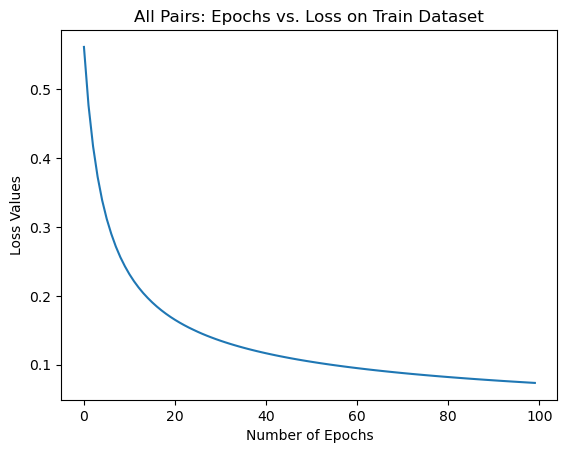

/var/folders/_c/xlv9fsg15_df99yllrpzxrw80000gn/T/ipykernel_19812/4199847050.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
/var/folders/_c/xlv9fsg15_df99yllrpzxrw80000gn/T/ipykernel_19812/4199847050.py:177: RuntimeWarning: divide by zero encountered in log
  return -(1 / len(preds)) * np.sum((y * np.log(preds) + (1 - y) * np.log(1 - preds)), axis=0)
/var/folders/_c/xlv9fsg15_df99yllrpzxrw80000gn/T/ipykernel_19812/4199847050.py:177: RuntimeWarning: invalid value encountered in multiply
  return -(1 / len(preds)) * np.sum((y * np.log(preds) + (1 - y) * np.log(1 - preds)), axis=0)
/var/folders/_c/xlv9fsg15_df99yllrpzxrw80000gn/T/ipykernel_19812/4199847050.py:158: RuntimeWarning: overflow encountered in multiply
  gL_w = X_batch.T @ (Z_batch - Y_batch) / len(X_batch) + (2 * self.lmbda * weights.T)
/var/folders/_c/xlv9fsg15_df99yllrpzxrw80000gn/T/ipykernel_19812/4199847050.py:155: RuntimeWarning: invalid value encountered in matmul
  Z_batch = sigmoid_fu

[1000, 100, 10, 1, 0.1, 0.01, 0.001]
[np.float64(0.899375), np.float64(0.899375), np.float64(0.316875), np.float64(0.17437499999999995), np.float64(0.11124999999999996), np.float64(0.09250000000000003), np.float64(0.09312500000000001)] [np.float64(0.9), np.float64(0.9), np.float64(0.3275), np.float64(0.1775), np.float64(0.12250000000000005), np.float64(0.09999999999999998), np.float64(0.09750000000000003)] [np.float64(0.8993993993993993), np.float64(0.9099099099099099), np.float64(0.3993993993993994), np.float64(0.19519519519519515), np.float64(0.14364364364364365), np.float64(0.12862862862862864), np.float64(0.12712712712712715)]


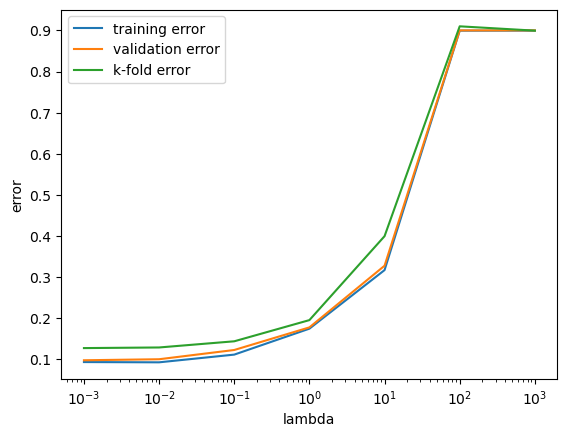

One vs. All: Train Accuracy: 0.906875
One vs. All: Validation Accuracy: 0.91


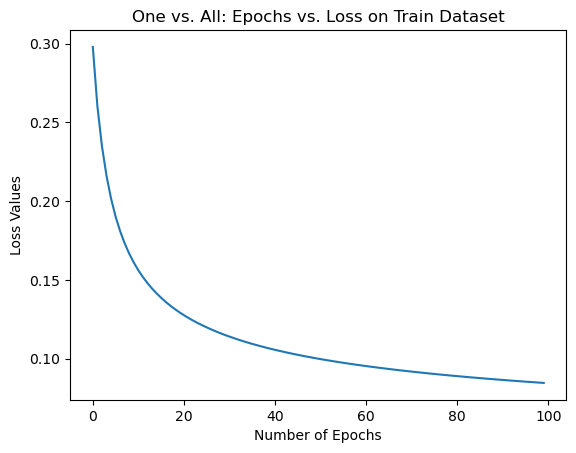

[1000, 100, 10, 1, 0.1, 0.01, 0.001]
[np.float64(0.899375), np.float64(0.859375), np.float64(0.48875), np.float64(0.244375), np.float64(0.15312499999999996), np.float64(0.10124999999999995), np.float64(0.09250000000000003)] [np.float64(0.9), np.float64(0.8475), np.float64(0.5), np.float64(0.24750000000000005), np.float64(0.13), np.float64(0.09499999999999997), np.float64(0.08999999999999997)] [np.float64(0.8993993993993993), np.float64(0.9054054054054054), np.float64(0.6366366366366366), np.float64(0.2652652652652653), np.float64(0.17367367367367367), np.float64(0.13163163163163163), np.float64(0.1306306306306306)]


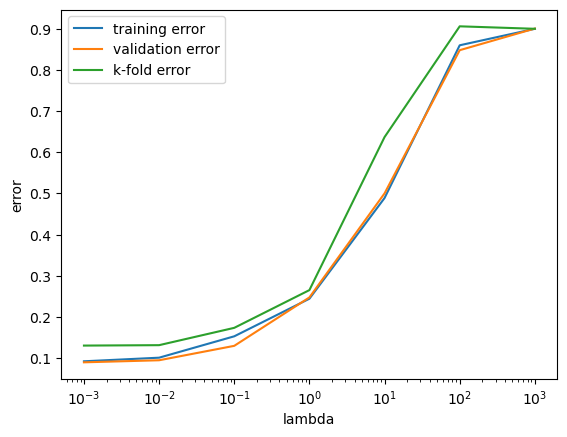

In [257]:
# Data preprocessing: load, clean, encode, scale, and split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def add_bias_and_numpy(df_X):
    """
    Convert pandas DataFrame to a NumPy array, stacking on a bias column (all 1s) to the
    left-hand side as needed for the model.
    @params:
        df_X: dataframe for conversion.
    @return:
        Numpy array of the features dataframe.
    """
    arr = df_X.values.astype(float)
    bias = np.ones((arr.shape[0], 1), dtype=float)
    return np.hstack([bias, arr])

def plot_loss(title, loss_dict):
    """
    Plots loss curves given a loss dictionary mapping epochs -> total number of loss values calc. in that epoch.
    The number of values per epoch corresponds to the number of classifiers ran during that epoch, which is equivalent
    to the number of unique classes in our dataset.
    @params
        title: title for visualization plot.
        loss_dict: dictionary holding our loss values per epoch
    @return: nothing
    """
    epochs, losses = [], []
    for k, v in loss_dict.items():
        epochs.append(k)
        losses.append(sum(v) / len(v))

    plt.title(title)
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Values")
    plt.plot(epochs, losses)
    plt.show()

def visualization(RR : RegularizedLogisticRegression, X_train, y_train, X_val, y_val, X_train_val, Y_train_val, model_type):
    """
    Visualizes the data by running k-fold cross validation on different lambda values for the classification task.
    @params
        X_train, y_train, X_val, y_val, X_train_val, Y_train_val: input data
        title: title for visualization plots
    @return: nothing
    """
    # Plot loss curves
    if RR.one_vs_all:
        RR.one_vs_all_train(X_train, y_train)
    elif RR.all_pairs:
        RR.all_pairs_train(X_train, y_train)
    print(f"{model_type}: Train Accuracy: " + str(RR.accuracy(X_train, y_train)))
    print(f"{model_type}: Validation Accuracy: " + str(RR.accuracy(X_val, y_val)))
    plot_loss(model_type + ": Epochs vs. Loss on Train Dataset", RR.losses)

    # Plot k fold errors
    lambda_list = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
    train_errors, val_errors = RR.runTrainTestValSplit(lambda_list, X_train, y_train, X_val, y_val)
    k_fold_errors = RR.runKFold(lambda_list, X_train_val, Y_train_val, 3)
    print(lambda_list)
    print(train_errors, val_errors, k_fold_errors)
    RR.plotError(lambda_list, train_errors, val_errors, k_fold_errors)

def preprocess_mnist(train_path="../data/mnist_train.csv", test_path="../data/mnist_test.csv", total_samples=2000, val_size=0.2):
    """
    Preprocesses the MNIST dataset. Subsets the data to a total of 5k examples for ease of running.
    @params:
        train_path: filepath to train data, test_path: filepath to test data
        total_samples: total samples across all data
        val_size: proportion alloc. for validation
    @return:
        X_train, X_val, X_test, y_train, y_val, y_test - split data
    """
    # Load both CSV files into dataframes
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
    df = df.sample(n=total_samples, random_state=0)

    # Extract labels and pixels and normalize pix values
    y = df.iloc[:, 0].values.astype(np.int64)
    X = df.iloc[:, 1:].values.astype(np.float32)
    X /= 255.0

    # Do the train/val split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=0, shuffle=True, stratify=y)

    return X_train, X_val, y_train, y_val

def main():
    X_train, X_val, y_train, y_val = preprocess_mnist()
    X_train_val = np.concatenate((X_train, X_val))
    Y_train_val = np.concatenate((y_train, y_val))

    # Run visualizations for both types of models
    visualization(RegularizedLogisticRegression(one_vs_all=False, all_pairs=True), X_train, y_train, X_val, y_val, X_train_val, Y_train_val, "All Pairs")
    visualization(RegularizedLogisticRegression(one_vs_all=True, all_pairs=False), X_train, y_train, X_val, y_val, X_train_val, Y_train_val, "One vs. All")
    
# Set random seeds. DO NOT CHANGE THIS IN YOUR FINAL SUBMISSION.
np.random.seed(0)
random.seed(0)
main()

Here, we try to reproduce sklearn results on the public MNIST dataset mentioned above.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

def compare_with_sklearn_one_vs_one():
    X_train, X_val, y_train, y_val = preprocess_mnist()

    my_ovo_model = RegularizedLogisticRegression(one_vs_all=True, all_pairs=False)
    my_ovo_model.one_vs_all_train(X_train, y_train)
    my_preds_ovo = my_ovo_model.predict(X_val)

    C_value = 1.0 / (2.0 * 0.001)
    sk_ovo_model = OneVsRestClassifier(
        LogisticRegression(
            penalty="l2",
            C=C_value,
            solver="lbfgs",
            max_iter=10000,
            fit_intercept=False  # because X already has a bias column
        )
    )
    sk_ovo_model.fit(X_train, y_train)
    sk_preds_ovo = sk_ovo_model.predict(X_val)
    my_acc_ovo = np.mean(my_preds_ovo == y_val)
    sk_acc_ovo = np.mean(sk_preds_ovo == y_val)

    print("=== One-vs-One (all-pairs) comparison ===")
    print("Our OVO logistic regression accuracy:     ", my_acc_ovo)
    print("Sklearn OVO logistic regression accuracy:", sk_acc_ovo)
    print("Predictions identical on this dataset?", np.array_equal(my_preds_ovo, sk_preds_ovo))

    return my_acc_ovo, sk_acc_ovo

compare_with_sklearn_one_vs_one()


=== One-vs-One (all-pairs) comparison ===
Our OVO logistic regression accuracy:      0.91
Sklearn OVO logistic regression accuracy: 0.875
Predictions identical on this dataset? False


(np.float64(0.91), np.float64(0.875))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
import numpy as np

def compare_with_sklearn_one_vs_one():
    X_train, X_val, y_train, y_val = preprocess_mnist()

    my_ovo_model = RegularizedLogisticRegression(one_vs_all=False, all_pairs=True)
    my_ovo_model.all_pairs_train(X_train, y_train)
    my_preds_ovo = my_ovo_model.predict(X_val)

    C_value = 1.0 / (2.0 * 0.001)
    sk_ovo_model = OneVsOneClassifier(
        LogisticRegression(
            penalty="l2",
            C=C_value,
            solver="lbfgs",
            max_iter=10000,
            fit_intercept=False  # because X already has a bias column
        )
    )
    sk_ovo_model.fit(X_train, y_train)
    sk_preds_ovo = sk_ovo_model.predict(X_val)
    my_acc_ovo = np.mean(my_preds_ovo == y_val)
    sk_acc_ovo = np.mean(sk_preds_ovo == y_val)

    print("=== One-vs-One (all-pairs) comparison ===")
    print("Our OVO logistic regression accuracy:     ", my_acc_ovo)
    print("Sklearn OVO logistic regression accuracy:", sk_acc_ovo)
    print("Predictions identical on this dataset?", np.array_equal(my_preds_ovo, sk_preds_ovo))

    return my_acc_ovo, sk_acc_ovo

compare_with_sklearn_one_vs_one()


=== One-vs-One (all-pairs) comparison ===
Our OVO logistic regression accuracy:      0.9
Sklearn OVO logistic regression accuracy: 0.9075
Predictions identical on this dataset? False


(np.float64(0.9), np.float64(0.9075))